# Creating the basic data structures

## Random Symmetric Matrix with diagonal 1 entries.

In [15]:
import numpy as np
import networkx as nx
import math

N = 5
b = np.random.uniform(0,1,size=(N,N))
b_symm = (b + b.T)/2
    
rows, cols = len(b_symm), len(b_symm[0])

for i in range(rows):
    for j in range(cols):
        if i == j:  # Check if the current element is on the diagonal
            b_symm[i][j] = 1  # Set the diagonal element to 1

In [2]:
b_symm

array([[1.        , 0.24227064, 0.18230026, 0.43318974, 0.62707697],
       [0.24227064, 1.        , 0.14905709, 0.37764368, 0.70325951],
       [0.18230026, 0.14905709, 1.        , 0.278921  , 0.49594393],
       [0.43318974, 0.37764368, 0.278921  , 1.        , 0.47754041],
       [0.62707697, 0.70325951, 0.49594393, 0.47754041, 1.        ]])

## Reading the off-diagonal entries and generating a filtration array

In [3]:
def get_off_diagonal_entries(matrix):    
    n = len(matrix)
    result_dict = {}

    for i in range(n):
        for j in range(i + 1, n):
            result_dict[(i, j)] = matrix[i][j]

    return result_dict


In [4]:
def get_filtration(off_diagonal):
    filtration = [(coords, value) for coords, value in off_diagonal.items()]
    
    # Sort the list of tuples based on the values
    filtration.sort(key=lambda x: x[1])
    return filtration

In [5]:
off_diag = get_off_diagonal_entries(b_symm)
filtration = get_filtration(off_diag)
filtration

[((1, 2), 0.149057091318875),
 ((0, 2), 0.182300256193831),
 ((0, 1), 0.24227063903354235),
 ((2, 3), 0.2789210000025898),
 ((1, 3), 0.377643675466179),
 ((0, 3), 0.4331897397881131),
 ((3, 4), 0.4775404091803539),
 ((2, 4), 0.49594393132571385),
 ((0, 4), 0.6270769740442621),
 ((1, 4), 0.7032595058005766)]

## Creating the graph corresponding to the filtrations

In [14]:
def generate_ngon_points(n):
    if n < 3:
        raise ValueError("n must be at least 3 for an n-gon.")
    
    points = {}

    for i in range(n):
        angle = 2 * math.pi * i / n  # Calculate the angle for each point
        x = math.cos(angle)  # Calculate x-coordinate
        y = math.sin(angle)  # Calculate y-coordinate
        points[i] = (x, y)  # Add the point to the dictionary

    return points


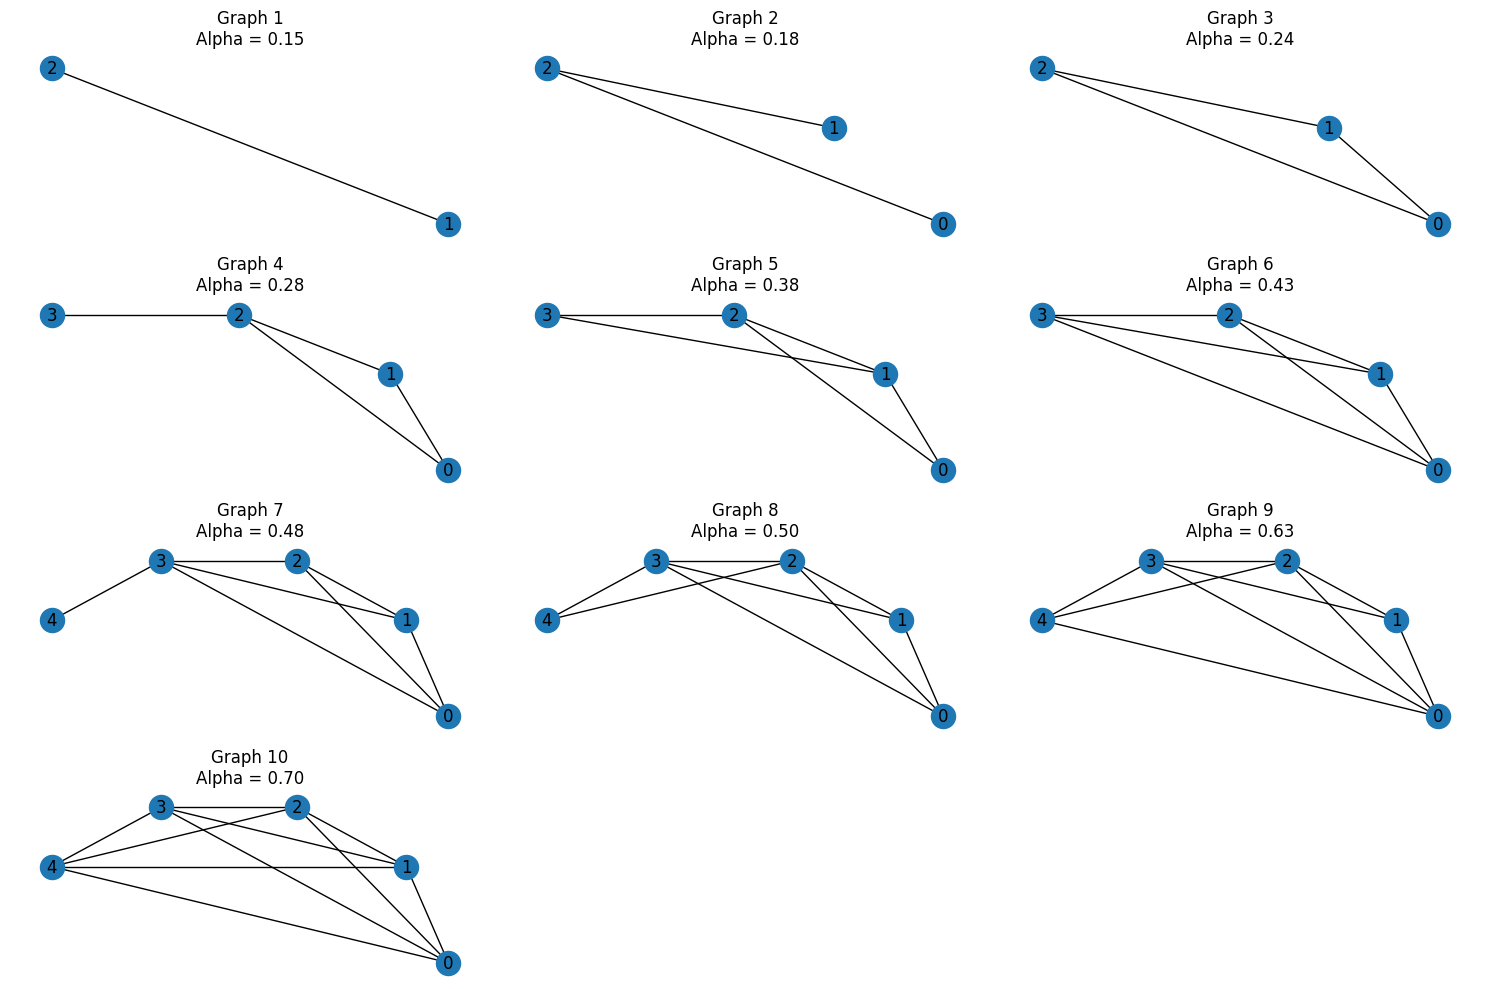

In [10]:
import matplotlib.pyplot as plt  # Optional for visualization
from IPython.display import display, HTML

# Create an empty list to store the graphs
graphs = []

# Initialize an empty graph
G = nx.Graph()

fixed_positions = generate_ngon_points(len(filtration))

for edge, value in filtration:
    G.add_edge(*edge)
    # You can add optional visualization code here to display the graph at each step
    # nx.draw(G, with_labels=True)
    # plt.show()
    pos = fixed_positions 
    graphs.append(G.copy())

num_graphs = len(filtration)
num_cols = min(num_graphs, 3)
num_rows = (num_graphs + num_cols - 1) // num_cols

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (edge, value) in enumerate(filtration):
    G.add_edge(*edge)
    graphs.append(G.copy())

    # Optional: Visualize the graphs
    row, col = divmod(i, num_cols)
    nx.draw(graphs[i], with_labels=True, pos=pos, ax=ax[row, col])
    ax[row, col].set_title(f"Graph {i+1}\nAlpha = {value:.2f}")

# Remove empty subplots if there are fewer graphs than expected
for i in range(num_graphs, num_rows * num_cols):
    fig.delaxes(ax.flat[i])
    
plt.tight_layout()  # Ensure the graphs don't overlap
plt.show()

## Generating the cliques of a graph.

In [16]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)


In [17]:
cliques = nx.enumerate_all_cliques(G)
for clique in cliques:
    print(clique)

[1]
[2]
[3]
[5]
[4]
[1, 2]
[1, 3]
[1, 5]
[2, 3]
[3, 4]
[5, 4]
[1, 2, 3]


## TODO: Generate the Clique complex using the simplicial package (+Filtration)

## TODO: Generate the Betti numbers of the clique complex for each filtration

## TODO: Graph the curve of the betti numbers as a function of the filtration value.